<a href="https://colab.research.google.com/github/fratava/ML-ENES-2022/blob/main/TF_Deportes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Multiclasificación de Deportes

### Problema a Resolver: ¿Podemos clasificar correctamente imágenes de deportes pero con poco material para trabajar?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import random
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Path = "/content/drive/MyDrive/deportes.zip (Unzipped Files)" #Depende de la ruta en tu máquina

In [7]:
os.makedirs(Path + "nuevos_datos", exist_ok=True)

In [ ]:
with zipfile.ZipFile(, 'r') as archive:
   # Extrae todo el contenido del achivo ZIP en el directorio actual
   archive.extractall("deportes")

In [12]:
os.listdir(Path)

['images to predict', 'valid', 'test', 'train']

In [10]:
#Normalizan los valores entre 0 y 1
train = ImageDataGenerator(rescale=1./255)
valid = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [11]:
train_dir = Path+"/train"
valid_dir = Path+"/valid"
test_dir = Path+"/test"

train_dataset = train.flow_from_directory(train_dir, 
                                  target_size = (224, 224), 
                                  color_mode = 'rgb',
                                  batch_size = 50,
                                  class_mode = 'categorical')

valid_dataset = train.flow_from_directory(valid_dir, 
                                  target_size = (224, 224), 
                                  color_mode = 'rgb',
                                  batch_size = 50,
                                  class_mode = 'categorical')

test_dataset = test.flow_from_directory(test_dir, 
                                target_size = (224, 224), 
                                color_mode = 'rgb', 
                                batch_size = 50,
                                class_mode= 'categorical')

Found 655 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 504 images belonging to 100 classes.


In [13]:
test_dataset.class_indices

{'air hockey': 0,
 'ampute football': 1,
 'archery': 2,
 'arm wrestling': 3,
 'axe throwing': 4,
 'balance beam': 5,
 'barell racing': 6,
 'baseball': 7,
 'basketball': 8,
 'baton twirling': 9,
 'bike polo': 10,
 'billiards': 11,
 'bmx': 12,
 'bobsled': 13,
 'bowling': 14,
 'boxing': 15,
 'bull riding': 16,
 'bungee jumping': 17,
 'canoe slamon': 18,
 'cheerleading': 19,
 'chuckwagon racing': 20,
 'cricket': 21,
 'croquet': 22,
 'curling': 23,
 'disc golf': 24,
 'fencing': 25,
 'field hockey': 26,
 'figure skating men': 27,
 'figure skating pairs': 28,
 'figure skating women': 29,
 'fly fishing': 30,
 'football': 31,
 'formula 1 racing': 32,
 'frisbee': 33,
 'gaga': 34,
 'giant slalom': 35,
 'golf': 36,
 'hammer throw': 37,
 'hang gliding': 38,
 'harness racing': 39,
 'high jump': 40,
 'hockey': 41,
 'horse jumping': 42,
 'horse racing': 43,
 'horseshoe pitching': 44,
 'hurdles': 45,
 'hydroplane racing': 46,
 'ice climbing': 47,
 'ice yachting': 48,
 'jai alai': 49,
 'javelin': 50,
 '

In [14]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    
    keras.layers.Dense(100, activation = 'softmax')
])


In [15]:
# setting hyperparameters
model1.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [17]:
history = model1.fit(
            train_dataset,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
14/14 - 269s - loss: 3.4247 - accuracy: 0.1695 - val_loss: 7.4550 - val_accuracy: 0.0100 - 269s/epoch - 19s/step
Epoch 2/10
14/14 - 130s - loss: 1.8442 - accuracy: 0.2412 - val_loss: 9.5214 - val_accuracy: 0.0200 - 130s/epoch - 9s/step
Epoch 3/10
14/14 - 127s - loss: 1.6082 - accuracy: 0.3145 - val_loss: 9.7364 - val_accuracy: 0.0180 - 127s/epoch - 9s/step
Epoch 4/10
14/14 - 129s - loss: 1.5388 - accuracy: 0.3618 - val_loss: 14.9513 - val_accuracy: 0.0220 - 129s/epoch - 9s/step
Epoch 5/10
14/14 - 148s - loss: 1.4107 - accuracy: 0.4244 - val_loss: 13.3446 - val_accuracy: 0.0300 - 148s/epoch - 11s/step
Epoch 6/10
14/14 - 146s - loss: 1.2201 - accuracy: 0.5344 - val_loss: 16.1712 - val_accuracy: 0.0300 - 146s/epoch - 10s/step
Epoch 7/10
14/14 - 132s - loss: 1.0269 - accuracy: 0.6275 - val_loss: 22.9461 - val_accuracy: 0.0360 - 132s/epoch - 9s/step
Epoch 8/10
14/14 - 127s - loss: 0.8746 - accuracy: 0.6794 - val_loss: 19.7440 - val_accuracy: 0.0360 - 127s/epoch - 9s/step
Epoch 9/

In [18]:

print("PERFOMANCE",model1.evaluate(test_dataset))


11/11 [==============================] - 115s 11s/step - loss: 19.8934 - accuracy: 0.0357
PERFOMANCE [19.89335823059082, 0.0357142873108387]


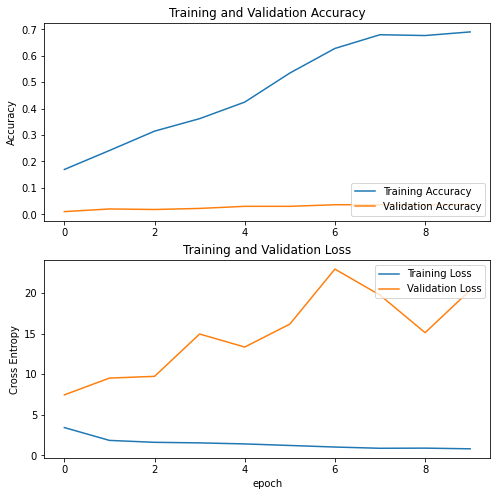

In [19]:
# get the metrics from history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [20]:
pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 


In [21]:
train_dataset_augmented = ImageDataGenerator(rescale = 1./255.,
                                             rotation_range = 40, 
                                             width_shift_range = 0.2, 
                                             height_shift_range = 0.2, 
                                             shear_range = 0.2, 
                                             zoom_range = 0.2, 
                                             horizontal_flip = True, 
                                             vertical_flip =True
                                            )

In [22]:
train_dataset_augmented = train.flow_from_directory(train_dir, 
                                                    target_size = (224, 224), 
                                                    color_mode = 'rgb',
                                                    batch_size = 50,
                                                    class_mode = 'categorical'
                                                   )

Found 6719 images belonging to 100 classes.


In [23]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(512, activation='relu'),
    
    keras.layers.Dense(100, activation = 'softmax')
])

In [24]:
# setting hyperparameters
model2.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [25]:
history2 = model2.fit(
            train_dataset_augmented,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:

print("PERFOMANCE",model2.evaluate(test_dataset))


In [ ]:
# get the metrics from history

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
import efficientnet.tfkeras as efn

In [27]:
base_model =  efn.EfficientNetB0(input_shape = (224, 224, 3), # Shape of our images
                                 include_top = False, # Leave out the last fully connected layer
                                 weights = 'imagenet')

16818176/16804768 [==============================] - 0s 0us/step


In [28]:
for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()  

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                   

In [29]:
model3 = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation = 'softmax')
])

In [30]:
# setting hyperparameters
model3.compile(optimizer='adam', # set the optimizer
               loss='categorical_crossentropy', # loss function
               metrics=['accuracy']) #accuracy metric

In [31]:
history3 = model3.fit(
            train_dataset_augmented,
            epochs=10, 
            validation_data=valid_dataset,
            verbose=2
            )

Epoch 1/10
135/135 - 1358s - loss: 1.4684 - accuracy: 0.6321 - val_loss: 6.9289 - val_accuracy: 0.4480 - 1358s/epoch - 10s/step
Epoch 2/10
135/135 - 332s - loss: 0.4078 - accuracy: 0.8794 - val_loss: 7.2593 - val_accuracy: 0.4760 - 332s/epoch - 2s/step
Epoch 3/10
135/135 - 334s - loss: 0.2516 - accuracy: 0.9266 - val_loss: 7.4954 - val_accuracy: 0.4800 - 334s/epoch - 2s/step
Epoch 4/10
135/135 - 339s - loss: 0.1717 - accuracy: 0.9479 - val_loss: 7.7738 - val_accuracy: 0.4840 - 339s/epoch - 3s/step
Epoch 5/10
135/135 - 338s - loss: 0.1259 - accuracy: 0.9619 - val_loss: 8.2423 - val_accuracy: 0.4760 - 338s/epoch - 3s/step
Epoch 6/10
135/135 - 335s - loss: 0.1023 - accuracy: 0.9710 - val_loss: 8.2922 - val_accuracy: 0.4900 - 335s/epoch - 2s/step
Epoch 7/10
135/135 - 343s - loss: 0.0745 - accuracy: 0.9777 - val_loss: 8.5058 - val_accuracy: 0.4820 - 343s/epoch - 3s/step
Epoch 8/10
135/135 - 333s - loss: 0.0840 - accuracy: 0.9741 - val_loss: 8.4248 - val_accuracy: 0.4840 - 333s/epoch - 2s/st

In [32]:

print("PERFOMANCE",model3.evaluate(test_dataset))


11/11 [==============================] - 25s 2s/step - loss: 9.1069 - accuracy: 0.4782
PERFOMANCE [9.106925010681152, 0.4781745970249176]


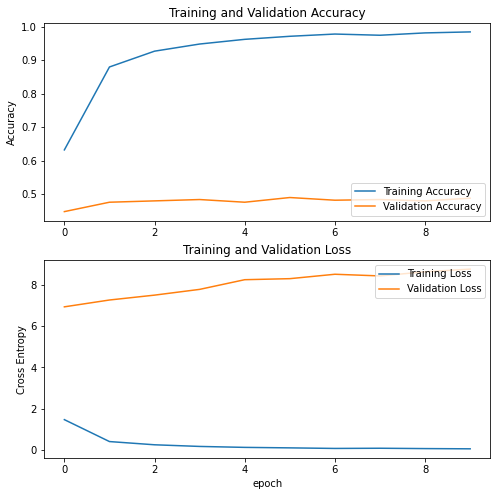

In [33]:
# get the metrics from history

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()